In [1]:
import pandas as pd

In [14]:
data = pd.read_csv('facies_data (1).csv')
data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [15]:
data.replace([1,2,3,4,5,6,7,8,9], ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS'], inplace=True)
data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,FSiS,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.9,11.915,4.6,SS,SS
1,FSiS,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.2,12.565,4.1,SS,0.979
2,FSiS,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.8,13.05,3.6,SS,0.957
3,FSiS,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.9,13.115,3.5,SS,0.936
4,FSiS,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.5,13.3,3.4,SS,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,MS,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,CSiS,0.685
3228,MS,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,CSiS,0.677
3229,MS,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.19,CSiS,0.669
3230,MS,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,CSiS,0.661


In [6]:
Q1 = data.GR.quantile(q=0.25)
Q3 = data.GR.quantile(q=0.75)
IQR = Q3-Q1
is_outlier = (data.GR <Q1 - 1.5*IQR) | (data.GR > Q3 + 1.5*IQR)
is_extreme_outlier = (data.GR < Q1 - 3*IQR) | (data.GR > Q3 + 3*IQR)
data_flagged = data[['Depth', 'GR']].assign(is_outlier=is_outlier, is_extreme_outlier=is_extreme_outlier)
data_flagged.loc[data_flagged['is_outlier'] | data_flagged['is_extreme_outlier']]

,Depth,GR,is_outlier,is_extreme_outlier
301,2944.0,234.800,True,True
302,2944.0,234.800,True,True
303,2944.5,273.480,True,True
304,2945.0,164.340,True,False
310,2948.0,129.740,True,False
...,...,...,...,...
3152,3083.0,174.750,True,False
3153,3083.5,184.125,True,True
3154,3084.0,184.125,True,True
3155,3084.5,178.625,True,True


In [8]:
Q1 = data.GR.quantile(q=0.25)
Q3 = data.GR.quantile(q=0.75)
IQR = Q3-Q1
is_outlier = (data.GR <Q1 - 1.5*IQR) | (data.GR > Q3 + 1.5*IQR)
data_flagged = data[['Depth', 'GR']].assign(is_outlier=is_outlier)
data_flagged.loc[data_flagged['is_outlier']]

,Depth,GR,is_outlier
301,2944.0,234.800,True
302,2944.0,234.800,True
303,2944.5,273.480,True
304,2945.0,164.340,True
310,2948.0,129.740,True
...,...,...,...
3152,3083.0,174.750,True
3153,3083.5,184.125,True
3154,3084.0,184.125,True
3155,3084.5,178.625,True


In [9]:
Q1 = data.GR.quantile(q=0.25)
Q3 = data.GR.quantile(q=0.75)
IQR = Q3-Q1
is_extreme_outlier = (data.GR < Q1 - 3*IQR) | (data.GR > Q3 + 3*IQR)
data_flagged = data[['Depth', 'GR']].assign(is_extreme_outlier=is_extreme_outlier)
data_flagged.loc[data_flagged['is_extreme_outlier']]

,Depth,GR,is_extreme_outlier
301,2944.0,234.800,True
302,2944.0,234.800,True
303,2944.5,273.480,True
415,3000.5,274.000,True
416,3001.0,358.740,True
417,3001.5,361.150,True
418,3002.0,227.990,True
799,2945.5,191.700,True
897,2997.0,201.750,True
898,2997.5,242.750,True


In [10]:
Q1 = data.ILD_log10.quantile(q=0.25)
Q3 = data.ILD_log10.quantile(q=0.75)
IQR = Q3-Q1
is_outlier = (data.ILD_log10 <Q1 - 1.5*IQR) | (data.ILD_log10 > Q3 + 1.5*IQR)
is_extreme_outlier = (data.ILD_log10 < Q1 - 3*IQR) | (data.ILD_log10 > Q3 + 3*IQR)
data_flagged = data[['Depth', 'ILD_log10']].assign(is_outlier=is_outlier, is_extreme_outlier=is_extreme_outlier)
data_flagged.loc[data_flagged['is_outlier'] | data_flagged['is_extreme_outlier']]

,Depth,ILD_log10,is_outlier,is_extreme_outlier
141,2863.5,1.405000,True,False
142,2864.0,1.452000,True,False
143,2864.5,1.465000,True,False
144,2865.0,1.480000,True,False
145,2865.5,1.479000,True,False
146,2866.0,1.437000,True,False
147,2866.5,1.360000,True,False
628,2855.0,1.311000,True,False
1421,2593.5,-0.004365,True,False
1422,2594.0,-0.011441,True,False


In [11]:
data['GR'].value_counts()

36.560    6
74.000    5
66.813    4
74.500    4
88.500    4
         ..
15.938    1
95.638    1
61.681    1
67.500    1
46.000    1
Name: GR, Length: 2776, dtype: int64

In [16]:
data['Facies'].value_counts()

CSiS    738
FSiS    615
PS      498
WS      462
SS      259
MS      217
SiSh    184
BS      161
D        98
Name: Facies, dtype: int64

In [20]:
data.describe(include='all')

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232,3232,3232,3232.000000,3232.000000,3232.000000,3232.0,3232.00,3232.0,3232,3232
unique,9,14,8,NaN,NaN,NaN,1055.0,1949.00,995.0,2,825
top,CSiS,C LM,CROSS H CATTLE,NaN,NaN,NaN,3.6,13.05,3.3,SS,SS
freq,738,483,501,NaN,NaN,NaN,31.0,14.00,133.0,1621,90
mean,NaN,NaN,NaN,2875.824567,66.135769,0.642719,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,131.006274,30.854826,0.241845,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2573.500000,13.250000,-0.025949,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2791.000000,46.918750,0.492750,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2893.500000,65.721500,0.624437,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2980.000000,79.626250,0.812735,NaN,NaN,NaN,NaN,NaN


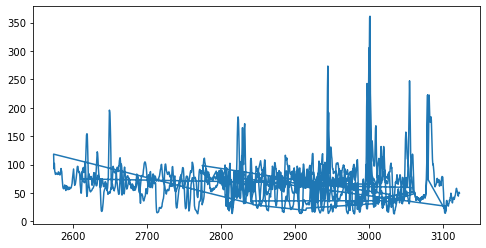

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(data['Depth'], data['GR'])